In [22]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import backend 
from keras.utils import np_utils
from keras import datasets, layers

In [23]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
img_rows, img_cols = x_train.shape[1:]

In [26]:
#Keras 설정 정보에 존재 : "image_data_format": "channels_last"

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [27]:
x_train.shape

(60000, 28, 28, 1)

In [28]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [29]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [30]:
model = keras.models.Sequential()

In [31]:
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])


In [32]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 157s 3ms/step - loss: 0.2802 - acc: 0.9145 - val_loss: 0.0663 - val_acc: 0.9816
Epoch 2/10
48000/48000 [==============================] - 159s 3ms/step - loss: 0.0973 - acc: 0.9703 - val_loss: 0.0516 - val_acc: 0.9848
Epoch 3/10
48000/48000 [==============================] - 161s 3ms/step - loss: 0.0708 - acc: 0.9789 - val_loss: 0.0398 - val_acc: 0.9878
Epoch 4/10
48000/48000 [==============================] - 161s 3ms/step - loss: 0.0569 - acc: 0.9827 - val_loss: 0.0375 - val_acc: 0.9891
Epoch 5/10
48000/48000 [==============================] - 173s 4ms/step - loss: 0.0476 - acc: 0.9852 - val_loss: 0.0383 - val_acc: 0.9879
Epoch 6/10
48000/48000 [==============================] - 175s 4ms/step - loss: 0.0441 - acc: 0.9853 - val_loss: 0.0377 - val_acc: 0.9900
Epoch 7/10
48000/48000 [==============================] - 173s 4ms/step - loss: 0.0377 - acc: 0.9883 - val_loss: 0.0353 - 

In [33]:
import pickle

In [35]:
#model.save('cnn_mnist.h5')
#pickle.dump(history, open('cnn_mnist_history.obj', 'wb'))

In [36]:
keras.models.load_model('cnn_mnist.h5')
history = pickle.load(open('cnn_mnist_history.obj', 'rb'))

In [37]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 10s 992us/step


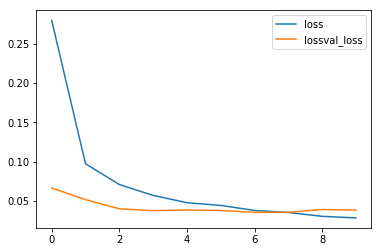

In [40]:
fig = plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='lossval_loss')
plt.legend()

In [41]:
(X1, y1), (X2, y2) = datasets.mnist.load_data()

In [42]:
X1.shape

(60000, 28, 28)

In [43]:
input = X1[0].reshape(1, 28, 28, 1)

In [44]:
input.shape

(1, 28, 28, 1)

In [45]:
model.predict_classes(input)

array([5], dtype=int64)

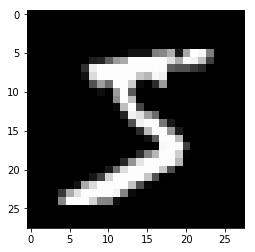

In [46]:
plt.imshow(X1[0], cmap='gray')

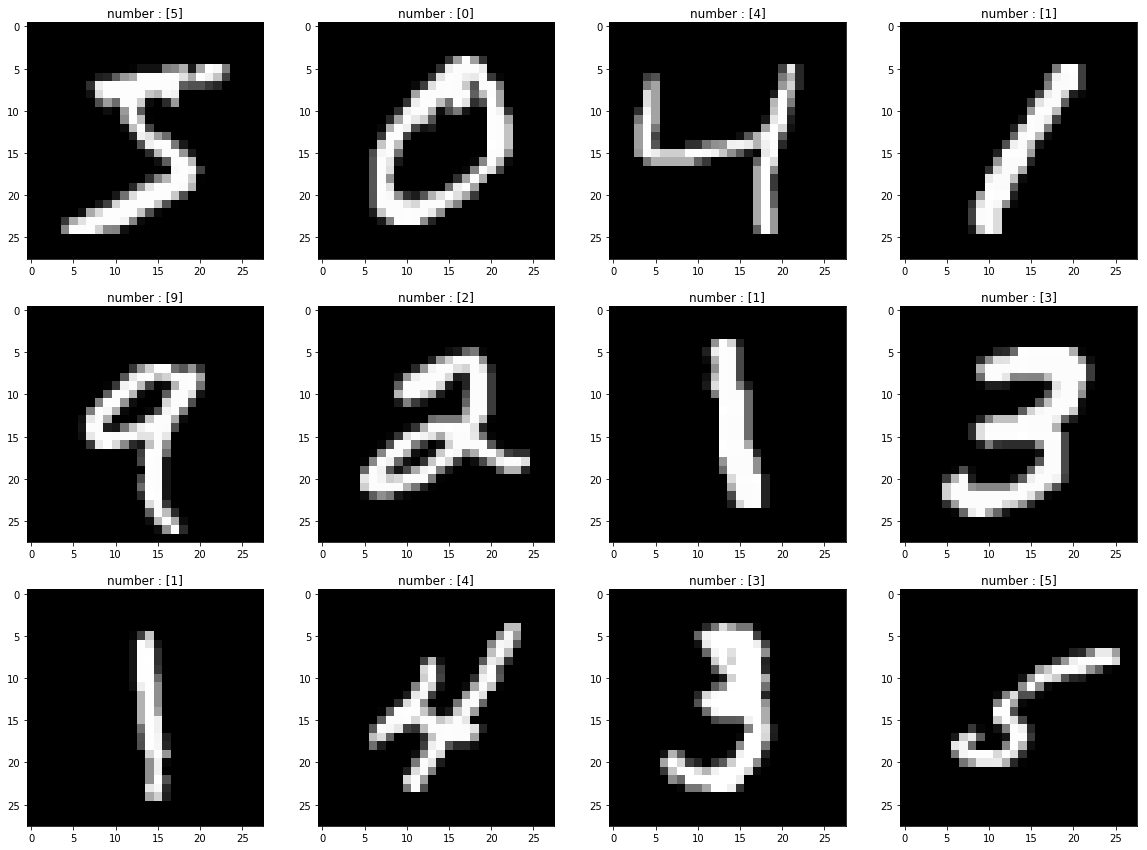

In [47]:
fig = plt.figure(figsize=(20,20))
for i in range(12):
    plt_temp = fig.add_subplot(4,4,i+1, title=("number : {}".format(model.predict_classes(X1[i].reshape(1, 28, 28, 1)/255))))
    plt_temp.imshow(X1[i], cmap='gray')
